In [1]:
import xarray as xr
fname='2000monthly-meant.nc'
ds=xr.open_dataset(fname)
print(ds)

<xarray.Dataset>
Dimensions:    (longitude: 144, latitude: 73, level: 9, time: 12)
Coordinates:
  * longitude  (longitude) float32 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * latitude   (latitude) float32 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
  * level      (level) int32 1 10 100 200 300 500 700 850 1000
  * time       (time) datetime64[ns] 2000-01-01 2000-02-01 ... 2000-12-01
Data variables:
    t          (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-05-02 21:24:59 GMT by grib_to_netcdf-2.21.0: grib_to_n...


In [2]:
ds.t

<xarray.DataArray 't' (time: 12, level: 9, latitude: 73, longitude: 144)>
[1135296 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * latitude   (latitude) float32 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
  * level      (level) int32 1 10 100 200 300 500 700 850 1000
  * time       (time) datetime64[ns] 2000-01-01 2000-02-01 ... 2000-12-01
Attributes:
    units:          K
    long_name:      Temperature
    standard_name:  air_temperature

In [3]:
ts1=ds.t[4,-1,:,:]

In [4]:
ts2=ds.t.isel(time=4, level=-1)

In [5]:
import datetime
date1 = datetime.datetime(year=2000,day=1,month=5)
ts3=ds.t.sel(time=date1,level=1000.0,method="nearest")

In [6]:
##Plotting data

Text(0.5, 1.0, 'Monthly mean sea level temperature in Hamburg')

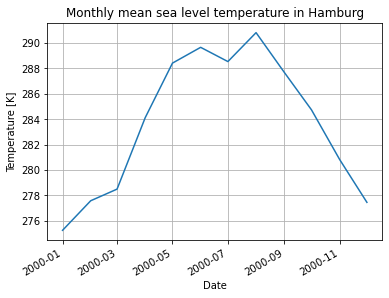

In [7]:
import xarray as xr
fname='2000monthly-meant.nc'
ds = xr.open_dataset(fname)
tham=ds.t.sel(level=1000.0, latitude="53.55",longitude=10.0, method="nearest")
tham.plot()
import matplotlib.pyplot as plt
plt.grid()
plt.xlabel('Date')
plt.title('Monthly mean sea level temperature in Hamburg')


Text(0.5, 1.0, 'Sea level mean monthly temperature in 2000')

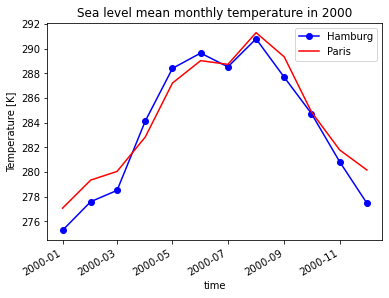

In [8]:
import matplotlib.pyplot as plt
tham=ds.t.sel(level=1000.0, latitude="53.55",longitude=10.0, method="nearest")
tpar=ds.t.sel(level=1000.0, latitude="48.86",longitude=2.35, method="nearest")
#Paris location is 48.86N and 2.35 E
tham.plot(color='blue', marker='o', label="Hamburg")
tpar.plot(color='red',label="Paris")
plt.legend()
plt.title('Sea level mean monthly temperature in 2000')

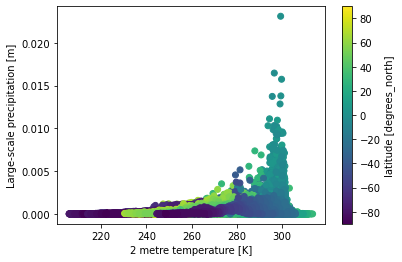

In [9]:
##Scatter plot
ds1=xr.open_dataset("2000monthly-surft-prec.nc")
ds1.plot.scatter(x="t2m",y="lsp", hue="latitude", cmap='viridis')

AttributeError: 'QuadMesh' object has no property 'fontsize'

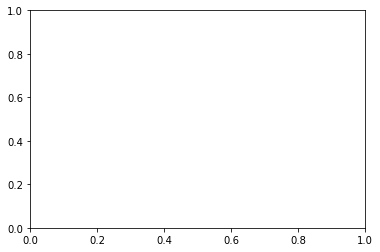

In [21]:
##Colormesh plot using xarray.plot
import datetime
date1 = datetime.datetime(year=2000,day=1,month=5)
tsea=ds.t.sel(level=1000.0, time=date1, method="nearest")
tsea.plot(add_colorbar=True, cmap="coolwarm", fontsize=16)

<a list of 14 text.Text objects>

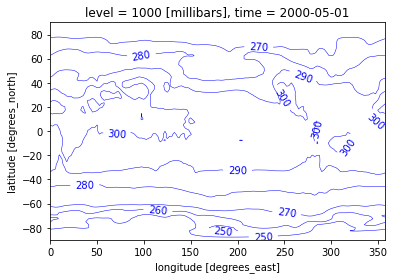

In [11]:
##2D contour plot
ax1=tsea.plot.contour(levels=10, colors="blue", linewidths=0.5,
    linestyles='solid')
plt.clabel(ax1, inline=1, fontsize=10)

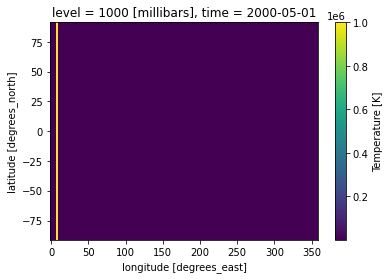

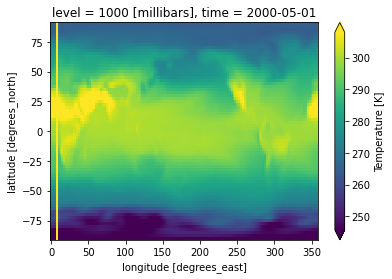

In [12]:
##xarray roboust plotting
plt.close('all') #close all plots
tsea[:,3]=1e6    #corrupt the data
fig1=plt.figure()
tsea.plot()      #plot using deafult setting
fig2=plt.figure()
tsea.plot(robust=True)  #roboust plotting

/var/folders/vj/2fsd02sj7rn0y103cxtdzbq80000gn/T/ipykernel_1921/2937351477.py:11: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax=plt.gca(projection=ccrs.PlateCarree())
/Users/mohammadbasiruddin/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/mohammadbasiruddin/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
 

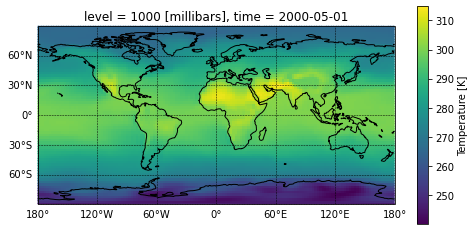

In [13]:
###Plotting data on the map
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

fname='2000monthly-meant.nc'
ds = xr.open_dataset(fname)

import datetime
date1 = datetime.datetime(year=2000,day=1,month=5)
tsea=ds.t.sel(level=1000.0, time=date1, method="nearest")

fig1=plt.figure(figsize=(8,4.0))
ax=plt.gca(projection=ccrs.PlateCarree())
tsea.plot(ax=ax,transform=ccrs.PlateCarree())
ax.coastlines()
gl=ax.gridlines(draw_labels=True,linewidth=0.5, color='black', linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
#remove labels on top and right so that they don’t clash with other elements

/var/folders/vj/2fsd02sj7rn0y103cxtdzbq80000gn/T/ipykernel_1921/2426665300.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax=plt.gca(projection=ccrs.Orthographic(10.0,53.55))


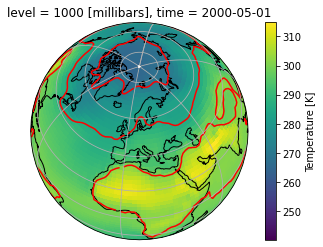

In [15]:
fig1=plt.figure()
ax=plt.gca(projection=ccrs.Orthographic(10.0,53.55))
# use longitude and latitude of Hamburg to center on Hamburg
tsea.plot(ax=ax,transform=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines() #labels are not supported yet
tsea.plot.contour(ax=ax, colors='red', transform=ccrs.PlateCarree())

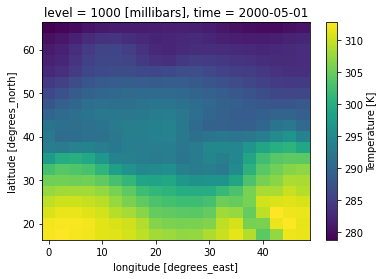

In [20]:
import datetime
date1 = datetime.datetime(year=2000,day=1,month=5)
tsea=ds.t.sel(level=1000.0, time=date1, method="nearest")
tl=tsea.isel(latitude=slice(10,30),longitude=slice(0,20))
# select subset of data containing Europe and North Africa
tl.plot()

/var/folders/vj/2fsd02sj7rn0y103cxtdzbq80000gn/T/ipykernel_1921/230541517.py:14: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax=plt.gca(projection=ccrs.PlateCarree())
/Users/mohammadbasiruddin/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/mohammadbasiruddin/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  

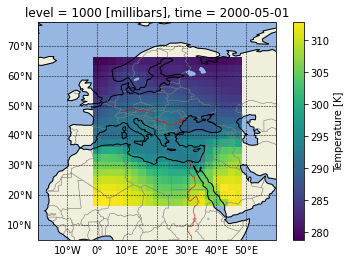

In [25]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import cartopy.feature as cfeature

fname='2000monthly-meant.nc'
ds = xr.open_dataset(fname)

import datetime
date1 = datetime.datetime(year=2000,day=1,month=5)
tsea=ds.t.sel(level=1000.0, time=date1, method="nearest")

ax=plt.gca(projection=ccrs.PlateCarree())

ax.set_extent([-20, 60, 5, 75])
tl=tsea.isel(latitude=slice(10,30),longitude=slice(0,20))
tl.plot(ax=ax,transform=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=0.6, edgecolor='gray')
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.RIVERS, linewidth=0.6, edgecolor='red')
gl=ax.gridlines(draw_labels=True,
      linewidth=0.5, color='black', linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False